In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from getfile import getfile
if not os.path.isfile('sbcdata.csv'):
    getfile()


In [ ]:
#EXPLORE DATA
df = pd.read_csv(r'sbcdata.csv')

# print("\nBasic information about the dataset:")
# print(df.info())

print('\nSummary statistics')
display(df.describe())

print("\nNumber of duplicate rows in the dataset:")
print(df.duplicated().sum())

print("\nMissing values in each column:")
print(df.isnull().sum())


Summary statistics


,Id,Age,Episode,Time,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC
count,2.709568e+06,2.709568e+06,2.709568e+06,2.709568e+06,5.884030e+05,1.627174e+06,2.579897e+06,2.579864e+06,203137.0000,2.578597e+06,2.579870e+06,2.579888e+06
mean,3.170488e+05,6.035030e+01,1.136900e+00,9.278317e+05,-4.755381e+05,4.176890e+01,7.027400e+00,8.897910e+01,4.5737,2.403540e+02,3.816800e+00,9.101500e+00
std,2.379363e+05,1.757210e+01,4.996000e-01,1.870502e+06,1.691930e+06,6.153760e+01,1.645800e+00,6.335300e+00,22.2291,1.274856e+02,8.950000e-01,7.899300e+00
min,1.000000e+00,1.800000e+01,1.000000e+00,0.000000e+00,-3.703464e+07,0.000000e+00,0.000000e+00,1.050000e+01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.036810e+05,5.000000e+01,1.000000e+00,0.000000e+00,-7.375800e+05,3.780000e+00,5.700000e+00,8.520000e+01,0.1400,1.670000e+02,3.100000e+00,5.880000e+00
50%,2.654315e+05,6.300000e+01,1.000000e+00,2.524200e+05,-1.287600e+05,1.439000e+01,7.100000e+00,8.880000e+01,0.4300,2.290000e+02,3.900000e+00,8.000000e+00
75%,5.261850e+05,7.400000e+01,1.000000e+00,1.113120e+06,0.000000e+00,5.447000e+01,8.300000e+00,9.260000e+01,1.8300,2.980000e+02,4.500000e+00,1.080000e+01
max,7.789800e+05,1.060000e+02,2.600000e+01,1.632744e+08,4.253190e+07,1.380000e+03,1.500000e+01,2.000000e+02,1335.0000,3.354000e+03,9.400000e+00,9.746000e+02



Number of duplicate rows in the dataset:
2

Missing values in each column:
Id                 0
Age                0
Sex                0
Diagnosis          0
Center             0
Set                0
Sender             0
Episode            0
Time               0
TargetIcu    2115892
SecToIcu     2121165
CRP          1082394
HGB           129671
MCV           129704
PCT          2506431
PLT           130971
RBC           129698
WBC           129680
dtype: int64


C:\Users\connc\AppData\Local\Temp\ipykernel_19064\1614354432.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sep[feature], label='SEP', shade=True)
C:\Users\connc\AppData\Local\Temp\ipykernel_19064\1614354432.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ctrl[feature], label='CTRL', shade=True)


KeyboardInterrupt: 

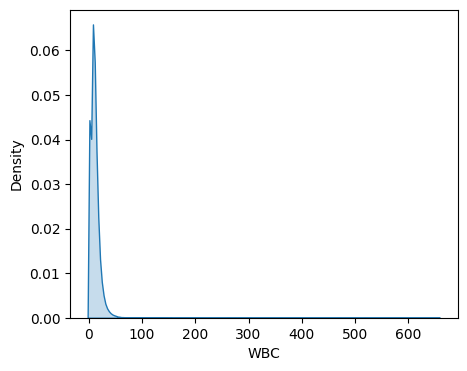

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['Id','Center', 'Set', 'Sender', 'Episode', 'Time','TargetIcu', 'SecToIcu','PCT', 'CRP','Sex'])

#group by target
groups = df.groupby(by='Diagnosis')
sep = groups.get_group('Sepsis') 
ctrl = groups.get_group('Control')  

#plot each feature individually
features = [col for col in df.columns if col != 'Diagnosis']
feature=features[5]

plt.figure(figsize=(5, 4))
sns.kdeplot(sep[feature], label='SEP', shade=True)
sns.kdeplot(ctrl[feature], label='CTRL', shade=True)
plt.title(f'Probability Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Density')
plt.legend()
plt.show()
